# Grid World

###### https://towardsdatascience.com/reinforcement-learning-markov-decision-process-part-2-96837c936ec3

In [8]:
from IPython.display import display, Math
from random import gauss, uniform, randint, random, choice
import math
import pprint
import matplotlib.pyplot as plt
import seaborn as sns; 

In [9]:
class GridWorld:
    
    def __init__(self, grid_size, A, B, A_prime, B_prime, A_goal, B_goal, gamma):
        self.grid_size = grid_size
        self.A = A
        self.B = B
        self.A_prime = A_prime
        self.B_prime = B_prime
        self.A_goal = A_goal
        self.B_goal = B_goal
        self.gamma = gamma
        self.terminal = []
        self.grid_world = [[0.0 for j in range(self.grid_size)] for i in range(self.grid_size)]
        self.directions = { 'east': (0, 1), 'west': (0, -1), 'north': (-1, 0), 'south': (1, 0)}
        self.policy = {}
        self.policy_values = {}
        self.reward = 0
        self.returns = []
        self.alpha = 0
        self.beta = 0
        self.probability = 1 / len(self.directions)
        self.explored = set()
        self.start = None
        self.actions = []
        
    def set_grid_size(self, grid_size):
        self.grid_size = grid_size
        
    def get_grid_size(self):
        return self.grid_size
    
    def set_A(self, A):
        self.A = A
        
    def get_A(self):
        return self.A
    
    def set_A_prime(self, A_prime):
        self.A_prime = A_prime
        
    def get_A_prime(self):
        return self.A_prime
    
    def set_B(self, B):
        self.B = B
        
    def get_B(self):
        return self.B
    
    def set_B_prime(self, B_prime):
        self.B_prime = B_prime
        
    def get_B_prime(self):
        return self.B_prime
   
    def set_A_goal(self, goal):
        self.A_goal = goal
        
    def get_A_goal(self):
        return self.A_goal
    
    def set_B_goal(self, goal):
        self.B_goal = goal
        
    def get_B_goal(self):
        return self.B_goal
    
    def set_gamma(self, gamma):
        self.gamma = gamma
    
    def Gamma(self):
        return self.gamma
    
    def set_terminal(self, terminal):
        self.terminal = terminal
    
    def get_terminal(self):
        return self.terminal
    
    def set_policy(self, policy):
        self.policy = policy
        
    def get_policy(self):
        return self.policy
    
    def set_policy_values(self, policy_values):
        self.policy_values = policy_values
        
    def get_policy_values(self):
        return self.policy_values
    
    def set_world(self, grid_world):
        self.grid_world = grid_world
    
    def get_world(self):
        return self.grid_world
    
    def set_returns(self, returns):
        self.returns += returns
        
    def get_returns(self):
        return self.returns
    
    def set_alpha(self, alpha):
        self.alpha = alpha
        
    def get_alpha(self):
        return self.alpha
    
    def set_beta(self, beta):
        self.beta = beta
        
    def get_beta(self):
        return self.beta
    
    def set_probability(self, probability):
        self.probability = probability
    
    def get_probability(self):
        return self.probability
    
    def initial_state(self):
        return [[0.0 for j in range(self.grid_size)] for i in range(self.grid_size)]
    
    def get_directions(self):
        return self.directions
    
    def greedy_vk(self, state, actions):
        
        # store values to find argmax a
        values = []
        
        # moves
        moves = []
        
        # check neighbors in current state
        for action in range(len(actions)):
            
            # get values for p(s',r|s,a)
            s_prime, reward = self.move(state, actions[action])
            
            # compute q_pi(s,a)
            value = reward + self.Gamma() * self.get_world()[s_prime[0]][s_prime[1]]
            
            # add to values
            values.append(value)
            
            # add action to moves 
            moves.append(actions[action])
        
        # return argmax a
        return moves[values.index(max(values))]

    def move(self, state, action):
        """
        State-Value Function Returns: State s', Reward r: from taking Action a in State s 
        q(s,a) in the Bellman Equation
        """
        
        # get the +10 reward for A -> A' 
        if self.A == state:
            return self.A_prime, self.A_goal
        
        # get the +5 reward for B -> B' 
        elif self.B == state:
            return self.B_prime, self.B_goal
        
        # get the next state
        state_prime = [state[0] + action[0], state[1] + action[1]]
        
        # row boundary
        row_boundary = (state_prime[0] < 0 or state_prime[0] >= self.grid_size) 
        
        # column boundary
        column_boundary = (state_prime[1] < 0 or state_prime[1] >= self.grid_size) 
        
        # check boundaries
        if row_boundary or column_boundary:
            self.reward = -1.0
            state_prime = state
        
        # no reward in this state
        else:
            self.reward = 0
            
        return state_prime, self.reward
    
    

In [10]:
def bellman(grid_world):
    """
    Policy Iteration
    """
    
    # check if bounded
    bounded = False
    
    # set parameter vector of target policy
    theta = 0.01
    
    # V(s) for all s of S
    V = grid_world.initial_state()
    
    # iterate delta < theta 
    while not bounded:
        
        # set delta 
        delta = 0
        
        # set width for rows, cols
        width = len(V)
        
        # set length iterate grid
        length = width * width
        
        # iterate grid states
        for i in range(length):
            
            # create row 
            row = i // width 
            
            # create column
            column = i % width
            
            # v <-- V(s)
            v = V[row][column]
            
            # value for V(s)
            value = 0
            
            # test all actions
            for action in grid_world.directions.values():
                
                # get next state, reward
                s_prime, reward = grid_world.move([row, column], action)

                # computed by solving the system of linear equations BELLMAN EQUATION pi(a|s)p(s',r|s,a)[r + discount*Vpi(s)]
                value += grid_world.get_probability() * (reward + grid_world.Gamma() * V[s_prime[0]][s_prime[1]])
                
            # add value to state
            V[row][column] = value
       
            # absolute difference |v-V(S)|
            delta = max(delta, abs(v - V[row][column]))
                    
        # loop until convergence
        if delta < theta:
            bounded = True
   
        # keep track of state values
        grid_world.set_world(V.copy())
        
    # optimal policy
    return grid_world

In [11]:
def bellman_improvement(grid_world):
    """
    Policy Improvement
    """
    
    # check if bounded
    bounded = False
    
    # set parameter vector of target policy
    theta = 0.01
    
    # V(s) for all s of S
    V = grid_world.initial_state()
    
    # iterate delta < theta 
    while not bounded:
        
        # set delta 
        delta = 0
        
        # grid with equiprobable random policy
        v = grid_world.get_world().copy()
        
        # set width for rows, cols
        width = len(v)
        
        # set length iterate grid
        length = width * width
        
        # iterate grid states
        for i in range(length):
            
            # create row 
            row = i // width 
            
            # create column
            column = i % width 
            
            # store the action values for state
            actions = {}
            
            # test all actions
            for direction, action in grid_world.directions.items():
                
                # get next state, reward
                s_prime, reward = grid_world.move([row, column], action)
                
                # UPDATE USING BELLMAN EQUATION
                value = grid_world.get_probability() * (reward + grid_world.Gamma() * V[s_prime[0]][s_prime[1]])
                
                # update actions
                actions[action] = value
            
            # place the optimal value in state
            V[row][column] = sum(actions.values()) 
            
            # update policy with optimal actions
            grid_world.policy[(row, column)] = [action for action, value in actions.items() if value == max(actions.values())]
            
            # update policy with optimal values
            grid_world.policy_values[(row, column)] = [value for action, value in actions.items() if value == max(actions.values()) and action in grid_world.policy[(row, column)]]
      
        # absolute difference |v-V(S)|
        delta = max(delta, abs(sum(list(map(sum, v))) - sum(list(map(sum, V)))))
        
        # keep track of previous grid state values
        grid_world.set_world(V)
       
        # loop until convergence
        if  delta < theta:
            bounded = True
            
        ######################
        # Policy Improvement #
        ######################
        while bounded:

            # policy stable <-- true
            policy_stable = True

            # iterate states of grid
            for i in range(length):

                # create row 
                row = i // width 

                # create column
                column = i % width 

                # old action <-- pi(s)
                old_action = choice(grid_world.policy[(row, column)])

                # pi(S) <-- argmax a
                new_action = grid_world.policy[(row, column)][grid_world.policy_values[(row, column)].index(max(grid_world.policy_values[(row, column)]))]

                # if old action != pi(s) policy stable <-- false 
                if old_action != new_action:
                    policy_stable = False
                    grid_world.policy[(row, column)].remove(old_action)

            # if policy stable return v* and pi* 
            if policy_stable:
                bounded = True
                return grid_world

            # go back to Evaluation step
            else:
                bounded = False


In [12]:
def bellman_optimal(grid_world):
    """
    Value Iteration
    """
    
    # check if bounded
    bounded = False
    
    # set parameter vector of target policy
    theta = 0.0000001
    
    # V(s) for all s of S
    V = grid_world.initial_state()
    
    # iterate delta < theta 
    while not bounded:
        
        # set delta 
        delta = 0
        
        # grid with zeros to keep track of difference
        v = grid_world.get_world().copy()
        
        # set width for rows, cols
        width = len(v)
        
        # set length it iterate 2d array
        length = width * width
        
        # iterate grid
        for i in range(length):
            
            # create row 
            row = i // width 
            
            # create column
            column = i % width 
            
            # store the action values for state
            actions = {}
            
            # test all actions
            for action in grid_world.directions.values():
                
                # get next state, reward
                s_prime, reward = grid_world.move([row, column], action)
                
                # UPDATE USING BELLMAN EQUATION
                value = grid_world.get_probability() * (reward + grid_world.Gamma() * V[s_prime[0]][s_prime[1]])
                
                # update actions
                actions[action] = value
            
            # place the optimal value in state
            V[row][column] = max(actions.values()) 
            
            # update policy with optimal actions
            grid_world.policy[(row, column)] = [action for action, value in actions.items() if value == max(actions.values())]
            
            # update policy with optimal values
            grid_world.policy_values[(row, column)] = [value for action, value in actions.items() if value == max(actions.values())]
            
        # absolute difference |v-V(S)|
        delta = max(delta, abs(sum(list(map(sum, v))) - sum(list(map(sum, V)))))
        
        # loop until difference is less than parameter
        if  delta < theta:
            bounded = True
            
        # keep track of previous grid state values
        grid_world.set_world(V)
        
    # optimal policy
    return grid_world

Policy Iteration: Evaluation Algorithm


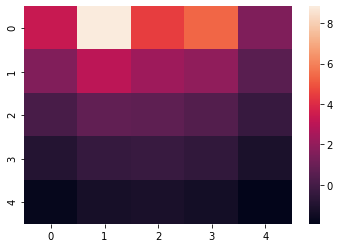

[[3.362486775241769, 8.834659309360454, 4.471501905905386, 5.363176926234546, 1.533956921644943],
 [1.571000984726717, 3.035910592348995, 2.290863928710077, 1.946436976692719, 0.5859122065442595],
 [0.098722795581945, 0.7806930738022357, 0.7126059736710069, 0.39602772675179676, -0.36591308664296684],
 [-0.9260154548630697, -0.39332129185147424, -0.3157776047095224, -0.5481194156586933, -1.1462548418986562],
 [-1.8101295438052738, -1.3031313050747872, -1.1902602939304843, -1.385529460093907, -1.9384673291472465]]

Policy Iteration: Improvement Algorithm
{(0, 0): [(0, 1)],
 (0, 1): [(0, 1), (0, -1), (-1, 0), (1, 0)],
 (0, 2): [(0, -1)],
 (0, 3): [(0, 1), (0, -1), (-1, 0), (1, 0)],
 (0, 4): [(0, -1)],
 (1, 0): [(-1, 0)],
 (1, 1): [(-1, 0)],
 (1, 2): [(-1, 0)],
 (1, 3): [(-1, 0)],
 (1, 4): [(0, -1)],
 (2, 0): [(-1, 0)],
 (2, 1): [(-1, 0)],
 (2, 2): [(-1, 0)],
 (2, 3): [(-1, 0)],
 (2, 4): [(-1, 0)],
 (3, 0): [(-1, 0)],
 (3, 1): [(-1, 0)],
 (3, 2): [(-1, 0)],
 (3, 3): [(-1, 0)],
 (3, 4): [(-

In [13]:
 if __name__ == '__main__':
        
        # create terminal printer instance
        pp = pprint.PrettyPrinter(width=160, compact=True)
        
        # create the grid world object
        grid_world = GridWorld(5, [0, 1], [0, 3], [4, 1], [2, 3], 10, 5, 0.9)

        # Policy Iteration: Evaluation Algorithm
        b = bellman(grid_world)
        print("Policy Iteration: Evaluation Algorithm")
        sns.heatmap(b.get_world())
        plt.show()
        pp.pprint(b.get_world())
        print()
        
        # Policy Iteration: Improvement Algorithm
        b1 = bellman_improvement(grid_world)
        print("Policy Iteration: Improvement Algorithm")
        pp.pprint(b1.get_policy())
        print()
        
        # Value Iteration: Optimal Algorithm
        b2 = bellman_optimal(grid_world)
        print("Value Iteration: Optimal Algorithm")
        pp.pprint(b2.get_policy())
        
        # Arrows for plotting
        a = [ '←', '↑', '→', '↓']